<a href="https://colab.research.google.com/github/insung1939/Algorithm_and_DataStructure/blob/main/hw1_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Setup

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
"""
Change directory to where this file is located
"""
%cd '/content/drive/MyDrive/Colab Notebooks/ML_Visual_Understanding/hw1/'

/content/drive/MyDrive/Colab Notebooks/ML_Visual_Understanding/hw1


## Import Modules

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mnist.data_utils import load_data

## K-Nearest Neighbor Implementation

In [62]:
class KNN:
    """ k-nearest neighbor classifier class """

    def train(self, X, y):
        """
        Trains the classifier using the given training data (X, y).

        Question (a)
        - Recall that for k-nearest neighbors this is just memorizing the training data.

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """

        # just memorizing X and y train data
        self.X_train = X
        self.y_train = y

    def inference(self, X_test, k=1, dist_metric='l2'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels.

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric) # 거리척도 기반으로 X_test 간의 거리계산
        y_pred = self.predict_labels(X_test, dists, k) # X_test 셋을 가지고 y_test를 예측수행
        return y_pred

    def compute_distance(self, X_test, dist_metric):
        """
        Computes the distance between the training data and test data using the given dist_metric.

        Question (b)
        - comlete the if and elif statements.
        - hint: you can use np.linalg.norm to normalize data for cosine similarity.
        - hint: you can use np.repeat and np.tile to vectorize L2 distance computation.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.
        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of traininig data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        """
        if dist_metric=='dot':
          # dot product for N*M size
          dists = -np.dot(X_test, self.X_train.T) # (N,D)*(D,M)=(N,M), 벡터의 값이 클수록 유사
        elif dist_metric=='cos':
          norm_test = np.linalg.norm(X_test, axis = 1, keepdims = 1)  # (N,1)
          norm_train = np.linalg.norm(self.X_train, axis = 1, keepdims = 1) # (M,1)
          # normalized data
          X_test_normalized = X_test / norm_test # (N,D)
          X_train_normalized = self.X_train / norm_train # (M,D)
          dists = 1 - np.dot(X_test_normalized,X_train_normalized.T) # (N,D)*(D,M)=(N,M), 코사인유사도는 1에 가까울수록 유사
        elif dist_metric=='l2':
          # euclidean distance
          dists = np.sqrt(
              np.sum(X_test**2, axis=1, keepdims=1) # (N,1)
              +np.sum(self.X_train**2, axis =1) # (M)
              -2*np.dot(X_test, X_train.T) # (N,M)
              )
        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Question (c)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of traininig data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        # number of test sample
        N = X_test.shape[0]
        y_pred = np.zeros(N)

        # N개의 샘플에 대해 예측된 y를 반환하는 작업
        for i in range(N):
          # 가까운 k개의 샘플 인덱스 가져오기 (가까운 거리를 이용)
          k_closest_idx = np.argsort(dists[i])[:k]
          # 인덱스에 해당하는 y_train 가져오기
          y_train = self.y_train[k_closest_idx].flatten()
          # 다수결 선택된 레이블, bincount는 배열의 각 값의 빈도를 세는 배열, argmax는 가장 큰 값을 가진 인덱스를 반환
          y_pred[i] = np.bincount(y_train).argmax()

        return y_pred


    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.

        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1) # 두번째 차원에 새로운 축 추가
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading

In [63]:
def sample_data(X, y, count):
    mask = np.random.choice(X.shape[0], count, replace=False) # 비복원추출
    X_sampled = X[mask]
    y_sampled = y[mask]
    return X_sampled, y_sampled

In [64]:
num_train_data = 1000
num_test_data = 200

X_train_src, y_train_src, X_test_src, y_test_src = load_data(one_hot_encoding=False) # Training data is flattened when it is loaded
X_train, y_train = sample_data(X_train_src, y_train_src, num_train_data) # sample 1000 train data
X_test, y_test = sample_data(X_test_src, y_test_src, num_test_data) # sample 200 test data

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


## Model Training & Evaluation

In [65]:
model = KNN()
model.train(X_train, y_train)

In [66]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.84


## Experiments

In [67]:
# Modify the number of k's and metrics to try as you want
num_ks = 50
metrics = ['dot', 'cos', 'l2']

In [68]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50



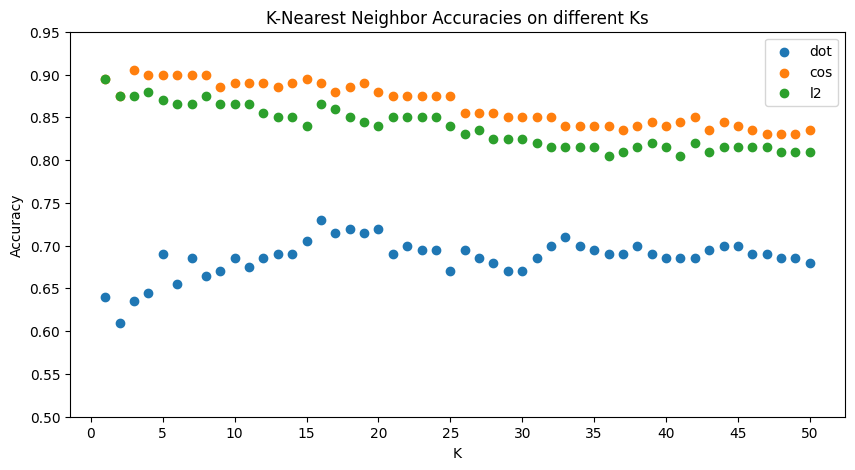

In [69]:
# Visualize the result
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [70]:
###
# Question (d)
# Briefly report what you observe in the plot above.
# Answer) Cosine similarity has the highest average accuracy.
# And the Euclidean distance metric follows as the second-best performing metric, maintaining relatively high accuracy exceeding 80%.
# But, the dot product metric has the lowest accuracy overall, suggesting that it would not be an effective metric in this data set.
# As the value of K increases, a general decline in accuracy is observed across all metrics.
# And I believe this trend indicates an underfitting problem leading to low accuracy.
# In summary, cosine similarity seems to be the best metric for this dataset, providing the highest accuracy.
# Furthermore, having bigger value of K should be avoided to prevent underfitting.

###

  Write your answer to (d) in this cell.

In [71]:
###
# Question (e)
# In what kind of dataset dot product(not cosine similarity) will serve as a good metric?
# Answer) If the magnitude of vectors is more important in a dataset,
# then the dot product would be a better metric compared to cosine similarity.
# This is because the dot product considers both the magnitude and the direction of the vectors.
# Thus, the dot product would be particularly useful in datasets that have physical quantities such as speed, force, or other measurements.
# Because the size and direction of the vectors are critical in the data sets.
###

  Write your answer to (e) in this cell.